# SENTIMENT ANALYSIS



# Install Library

In [1]:
!pip install aiohttp==3.7.0
!pip install nest_asyncio
!pip install emoji --upgrade
!pip install contractions
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 3.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=b2fd2764794bc1379c6

In [2]:
import numpy as np 
import pandas as pd
import io
import requests
from sklearn.model_selection import train_test_split 
from textblob import TextBlob

import nest_asyncio
nest_asyncio.apply()
import time
import os
import re
timestr = time.strftime("%Y%m%d")
import emoji
import contractions
import re

import nltk
nltk.download('stopwords' )
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download( 'wordnet' )
from nltk import pos_tag
from nltk.corpus import wordnet

from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

from subprocess import check_output


# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# Read Data

In [10]:
!git clone https://github.com/Kletuk31/SNA-Sentiment-Analysis-KTT-G20

Cloning into 'SNA-Sentiment-Analysis-KTT-G20'...
fatal: could not read Username for 'https://github.com': No such device or address


In [5]:
df = pd.read_csv('dataset_g20/1_data_raw_g20.csv')

In [9]:
df.shape

(1066, 3)

In [ ]:
# Data Cleaning
def cleansing(df) :
    # Replace RT tag
    t1 = re.sub('RT\s', '', df)
    # Replace @_username
    t2 = re.sub('\B@\w+', '', t1)
    # Replace emojis with text
    t3 = emoji.demojize(t2)
    # Replace URL (http:// or https://)
    t4 = re.sub('(http|https):\/\/\S+', '', t3)
    # Replace #_something_
    t5 = re.sub('#+', '', t4)
    # Lower case each Letter
    t6 = t5.lower() 
    # Replace word repetition with a single Bccurance ('oooooo' becomse 'oo')
    t7 = re.sub(r'(.)\1+', r'\1\1', t6)
    # Replace punctuation repetition with a single occurance ('!!!!!!!!!' becomes '!')
    t8 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', t7)
    # Alphabet only, exclude special characters
    t9 = re.sub('[^a-zA-Z0-9]', ' ', t8)
    # Replace contractions with their extended forms
    t10 = contractions.fix(t9)
    return t10

In [ ]:
# Removed symbols https, dan tag @
for i, r in df.iterrows():
    y = cleansing(r['tweet'])
   
    df.loc[i, 'tweet'] = y

df['tweet'] = df['tweet'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
df['tweet'] = df['tweet'].replace(r'@\S+', '', regex=True)

df.head()

,date,username,tweet
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan semua ...
1,2022-10-05 12:17:55,usharanimuni,pemerintah pastikan hotel di bali siap sambut ...
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel di bali siap sambut ...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium akan dibawa indonesia ke ktt g...
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...


In [ ]:
# Export Cleaning Data Result
df.to_csv('data_cleansed_g20.csv', index=False)

In [ ]:
# Call the data has been cleaning
df_cl = pd.read_csv('data_cleansed_g20.csv')
df_cl.head()

,date,username,tweet
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan semua ...
1,2022-10-05 12:17:55,usharanimuni,pemerintah pastikan hotel di bali siap sambut ...
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel di bali siap sambut ...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium akan dibawa indonesia ke ktt g...
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...


In [ ]:
# Removed Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('indonesian')
sw.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])
def stopwordsext(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df_cl['tweet'] = df_cl['tweet'].apply(stopwordsext)

In [ ]:
# Removed slang and nonstandard words

url="https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

def alay(text):
  for s,f in zip(c['slang'],c['formal']):
    if text == s:
      text = f
      return text
  return text

def ubah_alay(text):    
    text = [alay(word) for word in text.split()]
    return " ".join(text)

df_cl['tweet'] = df_cl['tweet'].apply(ubah_alay)

df_cl.head()

,date,username,tweet
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan hotel ...
1,2022-10-05 12:17:55,usharanimuni,pemerintah pastikan hotel bali sambut ktt g20 ...
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel bali sambut ktt g20 ...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium dibawa indonesia ktt g20 novem...
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...


In [ ]:
slang = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [ ]:
df_cl['tweet'] = df_cl['tweet'].apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))

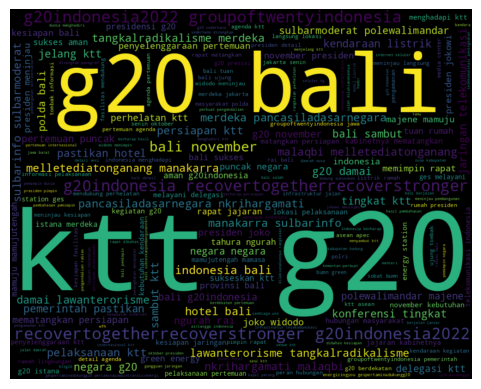

In [ ]:
# Shows the result using word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


allWords  = ' '.join( [str (twts) for twts in df_cl['tweet']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Export to csv
df_cl.to_csv('processed_data_g20.csv', index=False)

# df.to_excel(r'processed_data_g20.xlsx', index = False)
df_cl.head()

,date,username,tweet
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan hotel ...
1,2022-10-05 12:17:55,usharanimuni,pemerintah pastikan hotel bali sambut ktt g20 ...
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel bali sambut ktt g20 ...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium dibawa indonesia ktt g20 novem...
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...


In [ ]:
# Make a deep copy of the data frame
df_en = df_cl.copy()

# Rename columns
df_en.rename(columns={'tweet': 'tweet_en'}, inplace=True)

df_en.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan hotel ...
1,2022-10-05 12:17:55,usharanimuni,pemerintah pastikan hotel bali sambut ktt g20 ...
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel bali sambut ktt g20 ...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium dibawa indonesia ktt g20 novem...
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...


In [ ]:
# Import libraries
import googletrans
from googletrans import Translator

In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
# Show languages
print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [ ]:
# Create a translator object
translator = Translator()

In [ ]:
df_en

In [ ]:
# Modify all the terms of the data frame by using the previously created dictionary
df_en.replace(translations, inplace = True)

# Check translation
df_en.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,East Nusa Tenggara government ensures that Bal...
1,2022-10-05 12:17:55,ushranimuni,the government ensures that bali hotels welcom...
2,2022-10-05 12:13:03,diaharmayanti1,the government ensures that bali hotels welcom...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought by indonesia november ...
4,2022-10-05 12:11:59,diaharmayanti1,Indonesia's telecommunications network readine...


In [ ]:
# Export to csv
df_en.to_csv('translated_data_g20.csv', index=False)

# df_en.to_excel(r'processed_data_g20.xlsx', index = False)
df_en.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures bali hot...
1,2022-10-05 12:17:55,ushranimuni,government ensures bali hotels welcome g20 sum...
2,2022-10-05 12:13:03,diaharmayanti1,government ensures bali hotels welcome g20 sum...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia november g20...
4,2022-10-05 12:11:59,diaharmayanti1,indonesia's telecommunications network readine...


In [ ]:
# Call the data that has been translate into english

df_trans = pd.read_csv('translated_data_g20.csv')
df_trans.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures bali hot...
1,2022-10-05 12:17:55,ushranimuni,government ensures bali hotels welcome g20 sum...
2,2022-10-05 12:13:03,diaharmayanti1,government ensures bali hotels welcome g20 sum...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia november g20...
4,2022-10-05 12:11:59,diaharmayanti1,indonesia's telecommunications network readine...


In [ ]:
# Removed slang and nonstandard words

# extracting the stopwords from nltk library
sw = stopwords.words('english')
# sw.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
#                        'kalo', 'amp', 'biar', 'bikin', 'bilang', 
#                        'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
#                        'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
#                        'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
#                        'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
#                        '&amp', 'yah'])
def stopwordsext(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

df_trans['tweet_en'] = df_trans['tweet_en'].apply(stopwordsext)
df_trans['tweet_en'].head()

0    east nusa tenggara government ensures bali hot...
1    government ensures bali hotels welcome g20 sum...
2    government ensures bali hotels welcome g20 sum...
3    bali compendium brought indonesia november g20...
4    indonesia's telecommunications network readine...
Name: tweet_en, dtype: object

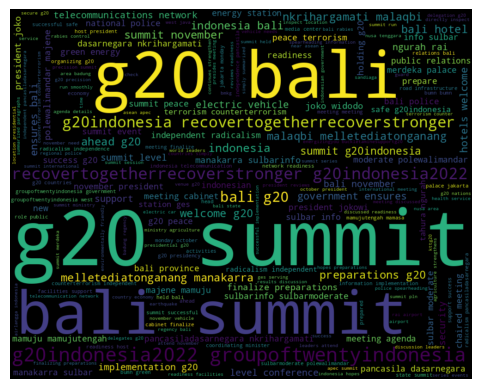

In [ ]:
# Shows the result using word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud


allWords  = ' '.join( [str (twts) for twts in df_trans['tweet_en']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Export to csv
df_trans.to_csv('translated_processed_data_g20.csv', index=False)
# df.to_excel(r'processed_data_g20.xlsx', index = False)
df_trans.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures bali hot...
1,2022-10-05 12:17:55,ushranimuni,government ensures bali hotels welcome g20 sum...
2,2022-10-05 12:13:03,diaharmayanti1,government ensures bali hotels welcome g20 sum...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia november g20...
4,2022-10-05 12:11:59,diaharmayanti1,indonesia's telecommunications network readine...


In [ ]:
# Define function for sentiment

from textblob import TextBlob

def getSubjectivity(review) :
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review) :
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
# Call the data has been process and translate into english (textblob can only analyze english)

df_tb = pd.read_csv('translated_processed_data_g20.csv')
df_tb.head()

final_data = pd.DataFrame(df_tb[['date', 'username', 'tweet_en']])
final_data.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures bali hot...
1,2022-10-05 12:17:55,ushranimuni,government ensures bali hotels welcome g20 sum...
2,2022-10-05 12:13:03,diaharmayanti1,government ensures bali hotels welcome g20 sum...
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia november g20...
4,2022-10-05 12:11:59,diaharmayanti1,indonesia's telecommunications network readine...


In [ ]:
# Apply sentiment with subjetivity, polarity dan analysis

final_data[ 'Subjectivity'] = final_data['tweet_en'].apply(getSubjectivity)
final_data['Polarity'] = final_data['tweet_en'].apply(getPolarity)
final_data['Analysis'] = final_data['Polarity'].apply(analyze)
final_data.head()

final_data.to_csv('sentiment_analysis_data_g20.csv', index=False)

In [ ]:
# Count the analysis results

tb_counts = final_data.Analysis.value_counts()
tb_counts

Neutral     523
Positive    458
Negative     85
Name: Analysis, dtype: int64

In [ ]:
# Preview the sentiment analysis data

j=1
sortedDF = final_data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') '+ sortedDF['tweet_en'][i])
        print()
        j = j + 1

1) minister communication information johnny plate kemkominfo media center summit g20 capacity 1,500 people media center located bicc hotel westin nusa bali, operating november 13, 17, 2022

2) g20 bali summit event promoting world-class umkm products, sindonews ordinary news

3) bumn bumn green energy station ges serving delegation g20 bali summit november 2022 energizingyou buckletaminesupportg20 pertaminapedtransitionenergy

4) bumn bumn green energy station ges serves delegations g20 bali summit november 2022 need g20 green electric vehicles energizingyou buckletaminesupportg20 pertaminapedenergy transition

5) kemenkominfo media center accommodates 1,500 journalists covering g20 summit level conference area bali international convention center bicc nusa province bali 15 16 november 2022

6) president inspects ngurah rai bali tahura, wrong implementation g20 bali summit series events 2022, ngurah rai tahura indonesia's concern world environment

7) reviewing tahura ngurah rai presi

([<matplotlib.patches.Wedge at 0x7f1a92ec7df0>,
 [Text(0.032413291275316905, 1.0995223410866655, 'Neutral'),
  Text(-0.30396279848327673, -1.0571691525665206, 'Positive'),
  Text(1.3078638627902246, -0.3346522320371297, 'Negative')],
 [Text(0.017679977059263764, 0.5997394587745447, '49.1%'),
  Text(-0.16579789008178727, -0.5766377195817384, '43.0%'),
  Text(0.8234698395345857, -0.2107069609122668, '8.0%')])

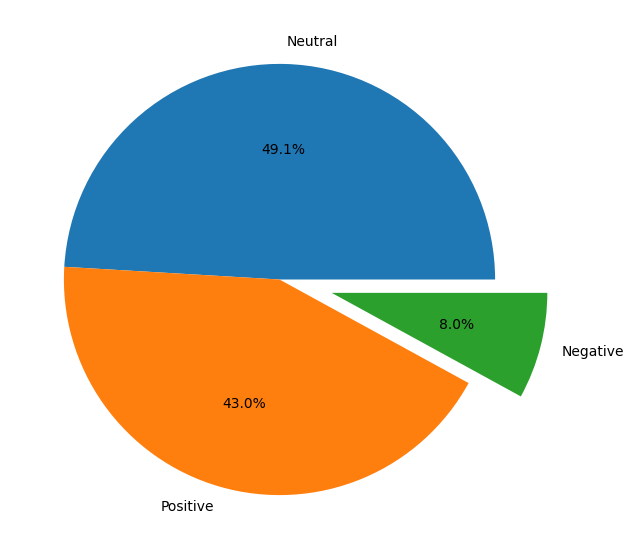

In [ ]:
# Make Pie Chart

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)

<Axes: title={'center': 'Sentiment Analysis'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

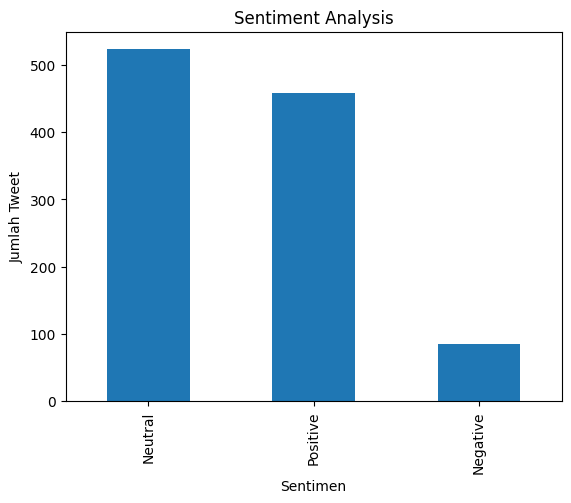

In [ ]:
# Make Bar Chart

final_data['Analysis'].value_counts().plot(kind='bar', title='Sentiment Analysis', xlabel='Sentimen', ylabel='Jumlah Tweet')

In [ ]:
# Make sure the amount of data is the same as the amount of raw data at the beginning
datafix = final_data[final_data['tweet_en'] != '']
datafix.Analysis.value_counts()

Neutral     523
Positive    458
Negative     85
Name: Analysis, dtype: int64

In [ ]:
datafix.count()

date            1066
username        1066
tweet_en        1066
Subjectivity    1066
Polarity        1066
Analysis        1066
dtype: int64

In [ ]:
# Import Sklearn for training and testing model

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [ ]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

In [ ]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = BernoulliNB()
clf4 = SVC()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=final_data.tweet_en
y=final_data.Analysis

In [ ]:
# Split data train and test

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=225)

In [ ]:
# Count the amount of train_test data

print('x_train :',len(x_train))
print('x_test  :',len(x_test))
print('y_train :',len(y_train))
print('y_test  :',len(y_test))

x_train : 852
x_test  : 214
y_train : 852
y_test  : 214


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])
model2= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf2)])
model3= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf3)])
model4= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf4)])

In [ ]:
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('classifier', SVC())])

In [ ]:
result1 = model.predict(x_test)
result2 = model2.predict(x_test)
result3 = model3.predict(x_test)
result4 = model4.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
# Model accuracy analysis with confusion matrix and classification report

import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
y_test.value_counts()

Neutral     107
Positive     88
Negative     19
Name: Analysis, dtype: int64

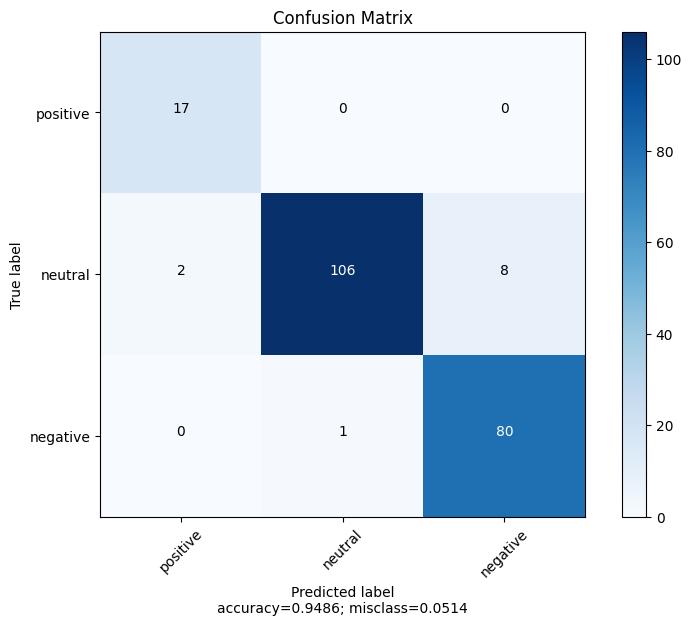

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(result1,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('result1.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,result1)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.89      0.94        19
     Neutral       0.91      0.99      0.95       107
    Positive       0.99      0.91      0.95        88

    accuracy                           0.95       214
   macro avg       0.97      0.93      0.95       214
weighted avg       0.95      0.95      0.95       214



In [ ]:
print(accuracy_score(result1,y_test))

0.9485981308411215


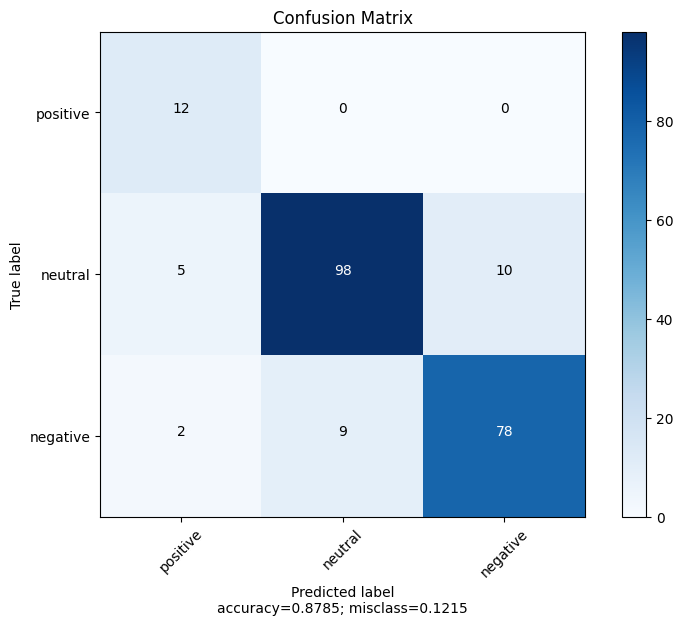

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(result2,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('result2.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,result2)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.63      0.77        19
     Neutral       0.87      0.92      0.89       107
    Positive       0.88      0.89      0.88        88

    accuracy                           0.88       214
   macro avg       0.91      0.81      0.85       214
weighted avg       0.88      0.88      0.88       214



In [ ]:
print(accuracy_score(result2,y_test))

0.8785046728971962


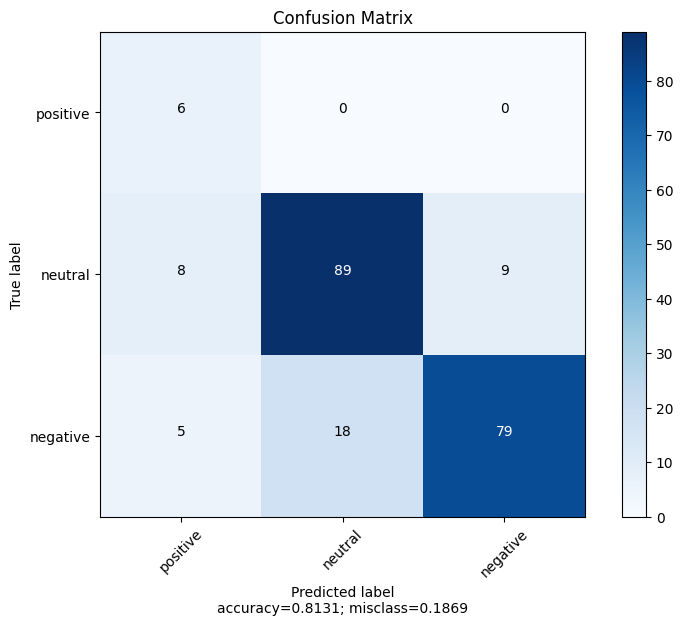

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(result3,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('result3.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,result3)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.32      0.48        19
     Neutral       0.84      0.83      0.84       107
    Positive       0.77      0.90      0.83        88

    accuracy                           0.81       214
   macro avg       0.87      0.68      0.72       214
weighted avg       0.83      0.81      0.80       214



In [ ]:
print(accuracy_score(result3,y_test))

0.8785046728971962


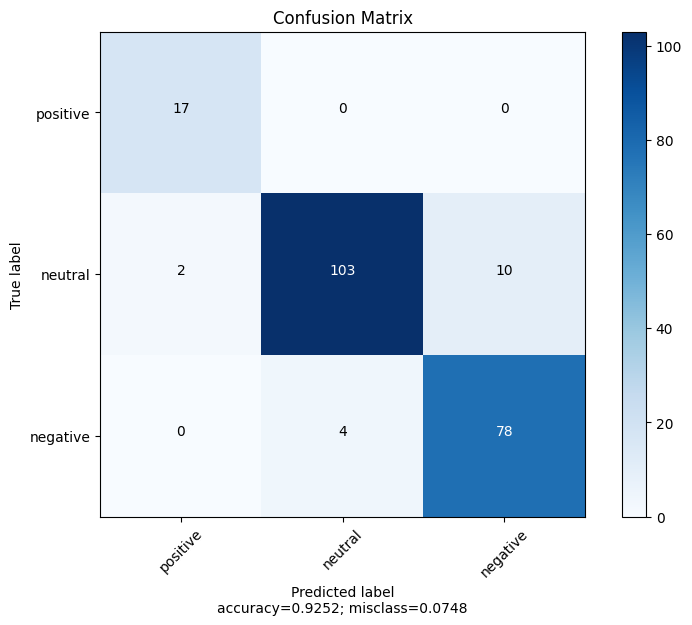

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_confusion_matrix(cm           = confusion_matrix(result4,y_test), 
                      normalize    = False,
                      target_names = ['positive', 'neutral', 'negative'],
                      title        = "Confusion Matrix")

plt.savefig('result4.png',bbox_inches='tight')

In [ ]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,result4)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

    Negative       1.00      0.89      0.94        19
     Neutral       0.90      0.96      0.93       107
    Positive       0.95      0.89      0.92        88

    accuracy                           0.93       214
   macro avg       0.95      0.91      0.93       214
weighted avg       0.93      0.93      0.93       214



In [ ]:
print(accuracy_score(result4,y_test))

0.9252336448598131


In [ ]:
# Make a deep copy of the data frame
df_sa = final_data.copy()

# Rename columns
df_sa.rename(columns={'tweet_en': 'tweet'}, inplace=True)

df_sa.head()

,date,username,tweet,Subjectivity,Polarity,Analysis
0,2022-10-05 12:21:14,jeslintuse2,east nusa tenggara government ensures bali hot...,0.9,0.8,Positive
1,2022-10-05 12:17:55,ushranimuni,government ensures bali hotels welcome g20 sum...,0.9,0.8,Positive
2,2022-10-05 12:13:03,diaharmayanti1,government ensures bali hotels welcome g20 sum...,0.9,0.8,Positive
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium brought indonesia november g20...,0.0,0.0,Neutral
4,2022-10-05 12:11:59,diaharmayanti1,indonesia's telecommunications network readine...,0.0,0.0,Neutral


In [ ]:
# Modify all the terms of the data frame by using the previously created dictionary
df_sa['tweet'] = df_cl['tweet']

# Check translation
df_sa.head()

,date,username,tweet,Subjectivity,Polarity,Analysis
0,2022-10-05 12:21:14,jeslintuse2,nusa tenggara timur pemerintah pastikan hotel ...,0.9,0.8,Positive
1,2022-10-05 12:17:55,ushranimuni,pemerintah pastikan hotel bali sambut ktt g20 ...,0.9,0.8,Positive
2,2022-10-05 12:13:03,diaharmayanti1,pemerintah pastikan hotel bali sambut ktt g20 ...,0.9,0.8,Positive
3,2022-10-05 12:12:31,SeptianiMestika,bali compendium dibawa indonesia ktt g20 novem...,0.0,0.0,Neutral
4,2022-10-05 12:11:59,diaharmayanti1,kesiapan jaringan telekomunikasi indonesia men...,0.0,0.0,Neutral


In [ ]:
# Take translate data back to Indonesian to see the sentiment results

# extracting the number of examples of each class

df = pd.read_csv('translated_sentiment_analysis_data_g20.csv')
df.head()

fix_data = pd.DataFrame(df[['date', 'username', 'tweet', 'Subjectivity', 'Polarity', 'Analysis']])
fix_data.head()

FileNotFoundError: ignored

In [ ]:
# Bagi dataset menjadi data training dan testing
train, test = train_test_split(data,test_size = 0.2)
# Hapus sentiment yang netral
train = train[train.sentiment != "Neutral"]

train_pos = train[ train['sentiment'] == 'Positif']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negatif']
train_neg = train_neg['text']

In [ ]:
train_pos

3144                                   Dipercaya kemenhan
2934    Menhan Minta Pengusaha Tongkang Taati Jalur Pe...
3439    info Kemenhan  Kebutuhan Bandan Intelijen Pert...
2774    Pelajar di Jabar Akan Diedukasi Hukum agama da...
3157    Danny Pomanto Minta Siswa Baru Dilatih Bela Ne...
                              ...                        
3497    Menteri Pertahanan Republik Indonesia Ryamizar...
3128    I m at Masjid At taqwa Kemenhan in Jakarta Cap...
3306    KASDIM Motivasi Calon Peserta Pelatihan Kader ...
3406    Alasan Kemenhan Ingin Bentuk Badan Intelejen P...
1720                Baik admim yang cantik :-D @Telkomsel
Name: text, Length: 1065, dtype: object

In [ ]:
train_neg

1832            @IndosatCare masih blm d follow up ini ya
2085    Kepala Badan Intelijen Negara BIN Sutiyoso men...
1194    @Telkomsel @nugroho2. Iya. Bener nomor itu. Ta...
2130    Kemenhan Serahkan Nasib Kolonel A Terkait Uang...
1276    @IndosatCare ask; min kok ooredo sama indosat ...
                              ...                        
1016    @Telkomsel kemarin, sering error tdk bs load g...
1325    @IndosatCare min; saya sudah tukar senyumpoin ...
2090                BAIS TNI dan Kemenhan Putus Hubungan 
1880    @Telkomsel @FunJunkies Telkomsel  butut..sodar...
941     Ada gangguan apa sama indosat ko gak bisa2 @In...
Name: text, Length: 1029, dtype: object

In [ ]:
#augment the stopwords with nonstandard twitter words
stopwords_set = set(stopwords.words("indonesian"))
stopwords_aug = {"ya","yak","iya","yg","ga","gak","gk","udh","sdh","udah","dah","nih","ini","deh","sih","dong","donk",
                 "sm","knp","utk","yaa","tdk","gini","gitu","bgt","gt","nya","kalo","cb","jg","jgn","gw","ge",
                 "sy","min","mas","mba","mbak","pak","kak","trus","trs","bs","bisa","aja","saja","no",
                 "w","g","gua","gue","emang","emg","wkwk","dr","kau","dg","gimana","apapun","apa",
                 "klo","yah","banget","pake","terus","krn","jadi","jd","mu","ku","si","hehe",
                 "tp","pa","lu","lo","lw","tw","tau","karna","kayak","ky","lg","untuk","tuk","dg","dgn"}
stopwords_all = stopwords_set.union(stopwords_aug)

In [ ]:
#stopwords_set

Positive words


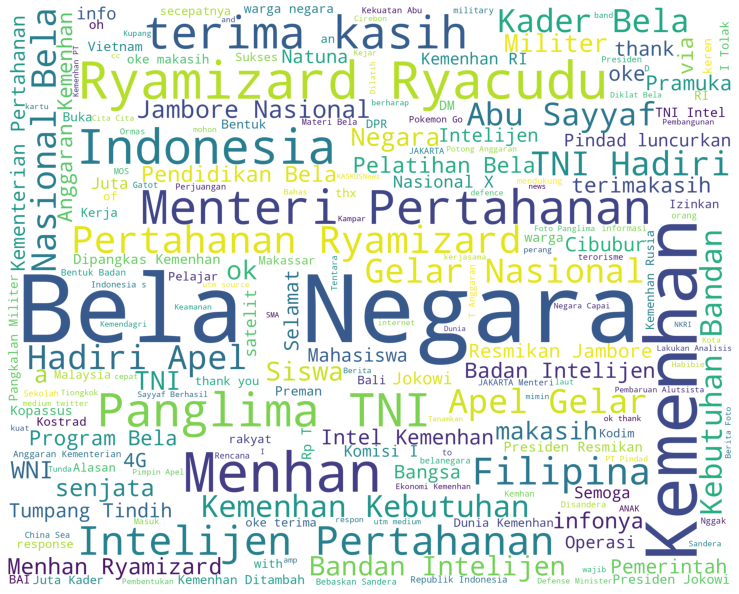

Negative words


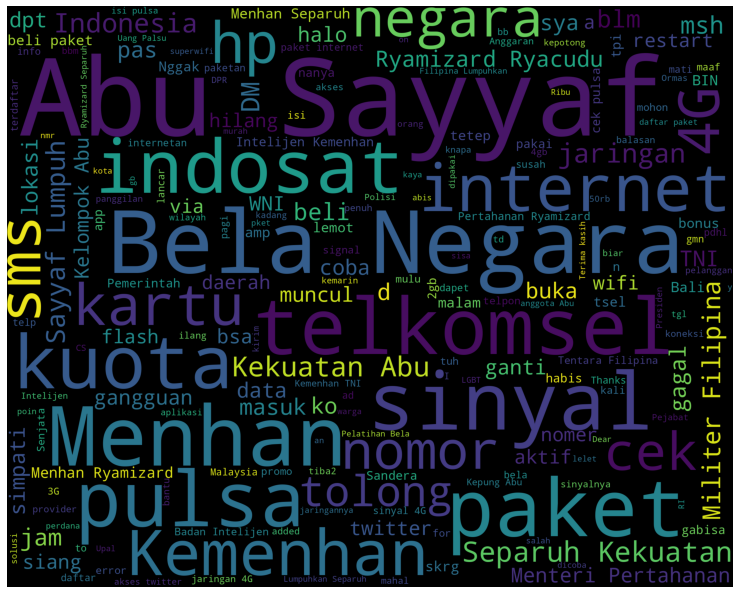

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=stopwords_all,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Data Preparation for Training Dataset

In [ ]:
tweets = []
#stopwords_set = set(stopwords.words("indonesia"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_all]
    tweets.append((words_cleaned,row.sentiment))

In [ ]:
tweets[:5]

[(['hari', 'ini', 'pukul', '16:13', 'wib', 'kak'], 'Netral'),
 (['masih', 'blm', 'follow', 'ini'], 'Negatif'),
 (['kepala',
   'badan',
   'intelijen',
   'negara',
   'bin',
   'sutiyoso',
   'menyatakan',
   'tidak',
   'masalah',
   'kementerian',
   'pertahanan',
   'kemenhan'],
  'Negatif'),
 (['dipercaya', 'kemenhan'], 'Positif'),
 (['saya', 'oppo'], 'Netral')]

Feature Extraction

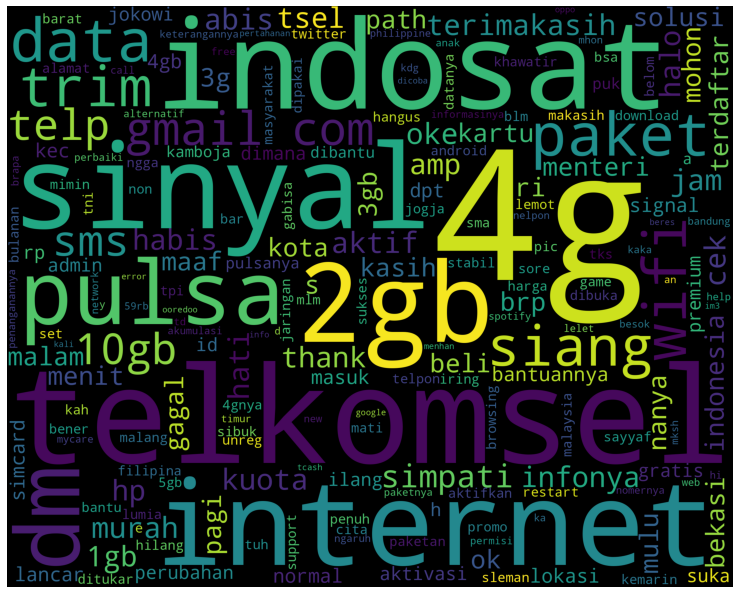

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))


def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features


wordcloud_draw(w_features)

Sentiment Classification Using Naive Bayes

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
print("Naive Bayes Algo accuracy percent:", (nltk.classify.accuracy(classifier, training_set))*100)

Naive Bayes Algo accuracy percent: 87.24890829694323


Test Classifier Using Test Dataset

In [ ]:
test_pos = test[test['sentiment'] == 'Positif']
test_pos = test_pos['text']
test_neg = test[test['sentiment'] == 'Negatif']
test_neg = test_neg['text']

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negatif'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positif'): 
        pos_cnt = pos_cnt + 1
        
print('[Negatif]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positif]: %s/%s '  % (len(test_pos),pos_cnt))

[Negatif]: 242/114 
[Positif]: 280/98 


In [ ]:
test_pos.head()

50      @Telkomsel setelah dikonf pihak telkomsel dan ...
3510    BP  Kemenhan  Kebutuhan Badan Intelijen Pertah...
3857    2 Sandera WNI Bebas, Menhan: Mereka Manfaatkan...
4272    Indonesia dan Vietnam Bahas Penguatan Kerja Sa...
1622                                 @Telkomsel yess yess
Name: text, dtype: object

In [ ]:
test_neg.head()

1120    @Telkomsel dan sekaran no telkomsel saya tdk b...
1410    Min sinyalnya 3g tp kok di pake lemot banget y...
1808    @Telkomsel benar min, gak bisa nelpon dan cek ...
3666                    Patroli Trilateral sudah Mendesak
1103    @Telkomsel sudah lebih 3 hari tapi belum ada l...
Name: text, dtype: object

In [ ]:
#w_feature

In [ ]:
nltk.FreqDist(get_words_in_tweets(tweets))

Test Classifier

In [ ]:
pred = classifier.classify(extract_features(['oke', 'nasional', 'banget', 'pulsa']))
pred

'Positif'

In [ ]:
#classifier.show_most_informative_features(20)

Save Classifier

In [ ]:
#To save the trained claassifier, do the following
import pickle
f = open('my_classifier.pickle', 'wb')
pickle.dump(classifier, f)
f.close()

In [ ]:
#To reload it:
f = open('my_classifier.pickle', 'rb')
classifier = pickle.load(f)
f.close()

In [ ]:
pred = classifier.classify(extract_features(['makasih', 'sinyal', 'banget']))
pred

'Negatif'